In [1]:
import xarray as xr
import proplot as pplt
import pandas as pd
import numpy as np
from pathlib import Path

from AOSCMcoupling.files import OIFSPreprocessor, NEMOPreprocessor

In [2]:
start_date = pd.Timestamp("2014-07-01")
oifs_preprocessor = OIFSPreprocessor(
    start_date, np.timedelta64(-7, "h")
)
nemo_preprocessor = NEMOPreprocessor(
    start_date, np.timedelta64(-7, "h")
)

In [3]:
plotting_output_dir = Path("plots/mass_flux_off")
plotting_output_dir.mkdir(exist_ok=True)

In [4]:
ece3_dir = Path("PAPA")

In [5]:
def load_datasets(output_dir, exp_ids):
    oifs_progvar = [
        xr.open_mfdataset(
            f"{output_dir}/{exp_id}/progvar.nc", preprocess=oifs_preprocessor.preprocess
        )
        for exp_id in exp_ids
    ]
    oifs_diagvar = [
        xr.open_mfdataset(
            f"{output_dir}/{exp_id}/diagvar.nc", preprocess=oifs_preprocessor.preprocess
        )
        for exp_id in exp_ids
    ]
    nemo_t_grids = [
        xr.open_mfdataset(
            f"{output_dir}/{exp_id}/{exp_id[:4]}*_T*.nc", preprocess=nemo_preprocessor.preprocess
        )
        for exp_id in exp_ids
    ]
    nemo_u_grids = [
        xr.open_mfdataset(
            f"{output_dir}/{exp_id}/{exp_id[:4]}*_U*.nc", preprocess=nemo_preprocessor.preprocess
        )
        for exp_id in exp_ids
    ]
    nemo_v_grids = [
        xr.open_mfdataset(
            f"{output_dir}/{exp_id}/{exp_id[:4]}*_V*.nc", preprocess=nemo_preprocessor.preprocess
        )
        for exp_id in exp_ids
    ]
    return oifs_progvar, oifs_diagvar, nemo_t_grids, nemo_u_grids, nemo_v_grids

In [6]:
exp_ids = ["MFN0", "MFN1", "MFN2", "MFNS_30"]
oifs_progvar_3, oifs_diagvar_3, nemo_t_grids_3, nemo_u_grids_3, nemo_v_grids_3 = load_datasets(Path("PAPA"), exp_ids)

In [ ]:
colors = ["m", "c", "y", "k"]
labels = ["parallel", "atm-first", "oce-first", "converged SWR"]
alpha = 1
linestyles = ["--", ":", "-.", "-"]

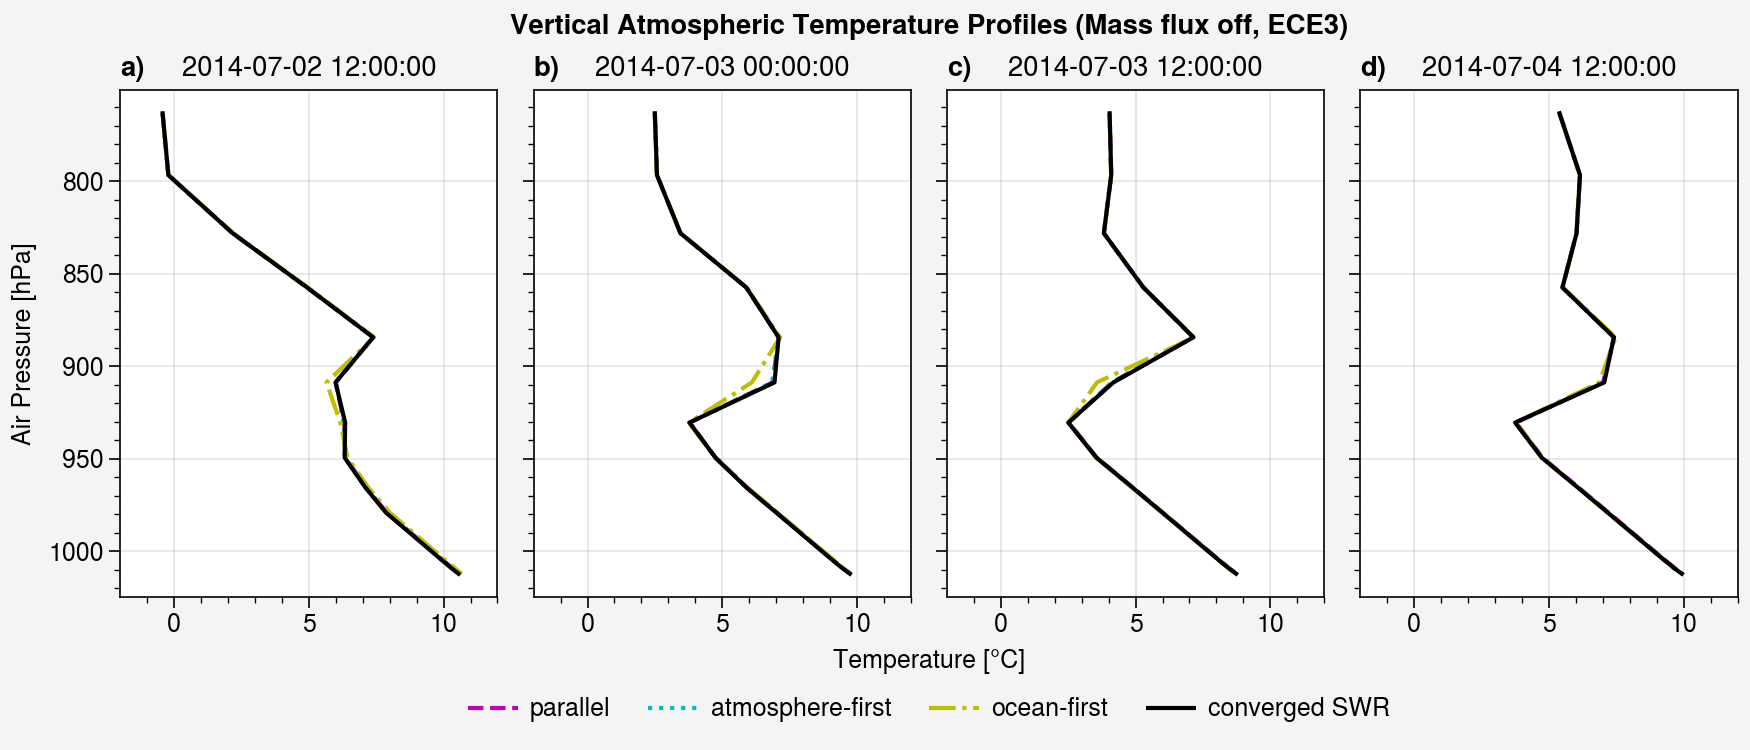

In [14]:
fig, axs = pplt.subplots(nrows=1, ncols=4, width="70em", height="30em")
axs.format(suptitle="Vertical Atmospheric Temperature Profiles (Mass flux off, ECE3)")
axs.format(abc="a)")
timestamps = [
    pd.Timestamp("2014-07-02 12:00"),
    pd.Timestamp("2014-07-03 00:00"),
    pd.Timestamp("2014-07-03 12:00"),
    pd.Timestamp("2014-07-04 12:00"),
]

ax = axs[0]
ims = []
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[0]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    im = ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ims.append(im)
    ax.format(title=timestamp)

ax = axs[1]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[1]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ax.format(title=timestamp)

ax = axs[2]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[2]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ax.format(title=timestamp)

ax = axs[3]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[3]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ax.format(title=timestamp)


for ax in axs:
    ax.format(
        xlabel="Temperature [°C]",
        ylabel="Air Pressure [hPa]",
        yreverse=True,
        xlim=[-2, 12],
    )

fig.legend(ims, frame=False, ncols=4, loc="b")
fig.savefig(plotting_output_dir / "ece3_air_temperature_stratification.pdf")